## wine quality prediction


In [1]:
import pandas as pd
import numpy as np


In [2]:
wine = pd.read_csv("wine_data.csv")

In [3]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.isnull().sum()

fixed_acidity            0
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulphur_dioxide     0
total_sulphur_dioxide    0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [5]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine.shape

(4898, 12)

In [7]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine, test_size= 0.2, random_state= 42)
print(f"Rows in train set: {len(train_set)} \n Rows in test set:{len(test_set)} ")

Rows in train set: 3918 
 Rows in test set:980 


In [9]:
wine_train_sample = train_set

In [10]:
train_set.shape

(3918, 12)

# looking for correlation

In [11]:
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                  1.000000
alcohol                  0.435575
pH                       0.099427
sulphates                0.053678
free_sulphur_dioxide     0.008158
citric_acid             -0.009209
residual_sugar          -0.097577
fixed_acidity           -0.113663
total_sulphur_dioxide   -0.174737
volatile_acidity        -0.194723
chlorides               -0.209934
density                 -0.307123
Name: quality, dtype: float64

array([[<AxesSubplot:xlabel='quality', ylabel='quality'>,
        <AxesSubplot:xlabel='alcohol', ylabel='quality'>,
        <AxesSubplot:xlabel='chlorides', ylabel='quality'>,
        <AxesSubplot:xlabel='density', ylabel='quality'>],
       [<AxesSubplot:xlabel='quality', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='chlorides', ylabel='alcohol'>,
        <AxesSubplot:xlabel='density', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='quality', ylabel='chlorides'>,
        <AxesSubplot:xlabel='alcohol', ylabel='chlorides'>,
        <AxesSubplot:xlabel='chlorides', ylabel='chlorides'>,
        <AxesSubplot:xlabel='density', ylabel='chlorides'>],
       [<AxesSubplot:xlabel='quality', ylabel='density'>,
        <AxesSubplot:xlabel='alcohol', ylabel='density'>,
        <AxesSubplot:xlabel='chlorides', ylabel='density'>,
        <AxesSubplot:xlabel='density', ylabel='density'>]], dtype=object)

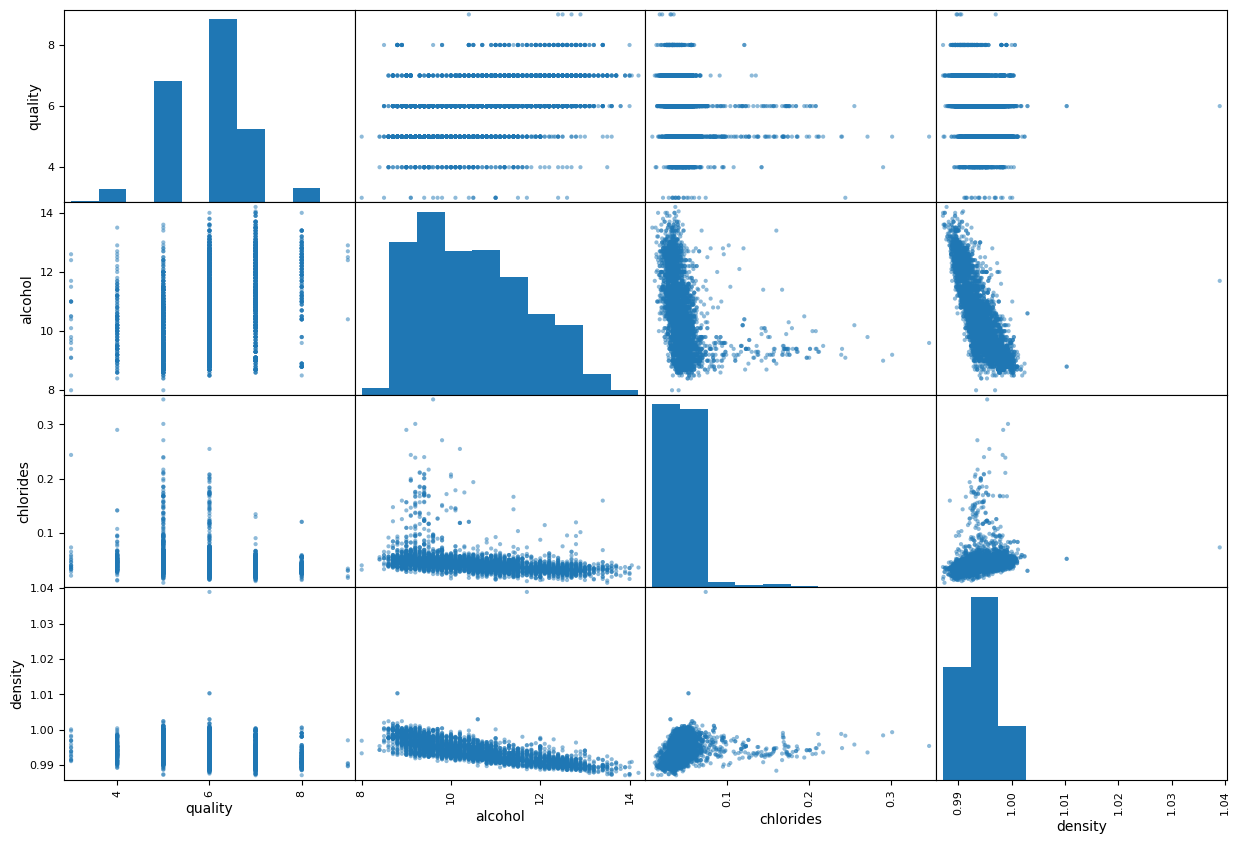

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["quality","alcohol", "chlorides","density"]
scatter_matrix(wine[attributes], figsize = (15,10))

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

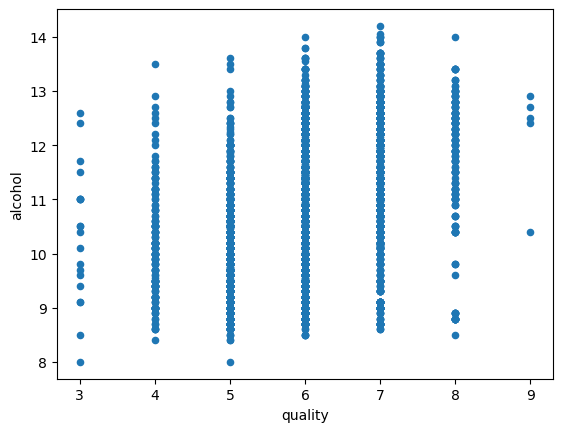

In [13]:
wine.plot(kind= "scatter", x= "quality", y= "alcohol")

In [14]:
wine['ald']= wine['alcohol']/ wine["density"]

In [15]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,ald
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,8.791209
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,9.557344
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,10.149734
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,9.943753
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,9.943753


In [16]:
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending = False)

quality                  1.000000
alcohol                  0.435575
ald                      0.434966
pH                       0.099427
sulphates                0.053678
free_sulphur_dioxide     0.008158
citric_acid             -0.009209
residual_sugar          -0.097577
fixed_acidity           -0.113663
total_sulphur_dioxide   -0.174737
volatile_acidity        -0.194723
chlorides               -0.209934
density                 -0.307123
Name: quality, dtype: float64

In [17]:
wine = wine_train_sample.drop("quality", axis =1)
wine_labels = wine_train_sample["quality"].copy()


In [18]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.865046,0.279338,0.332731,6.450702,0.045734,35.094564,138.001149,0.994071,3.189293,0.489781,10.508840
std,0.844483,0.101606,0.119758,5.139311,0.021797,16.676958,42.067667,0.003022,0.150183,0.113590,1.227887
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,10.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991740,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,33.000000,134.000000,0.993800,3.180000,0.470000,10.400000
75%,7.300000,0.330000,0.380000,10.000000,0.050000,46.000000,167.000000,0.996200,3.280000,0.550000,11.400000
max,11.800000,1.100000,1.660000,65.800000,0.346000,146.500000,313.000000,1.038980,3.820000,1.080000,14.200000


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(wine)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([6.800e+00, 2.600e-01, 3.200e-01, 5.200e+00, 4.300e-02, 3.300e+01,
       1.340e+02, 9.938e-01, 3.180e+00, 4.700e-01, 1.040e+01])

In [21]:
x = imputer.transform(wine)

In [22]:
wine_tr = pd.DataFrame(x, columns= wine.columns)

# creating pipeline


In [23]:
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler())])

In [25]:
wine_num = my_pipeline.fit_transform(wine)

In [26]:
wine_num

array([[ 0.51511931, -1.07623315,  0.22773076, ..., -0.32826101,
        -0.70244474,  1.54037099],
       [-0.66918809, -0.28877673,  0.89583195, ..., -0.06188569,
         0.26607415, -0.82171197],
       [-1.49820327,  0.40024764, -0.02280718, ...,  0.40427112,
         0.00193263,  0.48150622],
       ...,
       [ 0.87041153, -0.09191263,  1.56393313, ..., -1.12738698,
         0.35412132,  0.72585963],
       [-0.66918809, -0.38720878, -0.35685777, ..., -0.12847952,
        -0.96658625,  0.07425053],
       [ 1.46256523, -0.09191263,  0.14421812, ...,  0.20448963,
         1.23459303, -0.08865174]])

In [27]:
wine_num.shape

(3918, 11)

# Model Selection

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(wine_num, wine_labels)

RandomForestRegressor()

In [29]:
some_data = wine.iloc[:5]

In [30]:
some_labels = wine_labels.iloc[:5]

In [31]:
prepared_data = my_pipeline.transform(some_data)

In [32]:
model.predict(prepared_data)

array([6.19, 5.19, 6.03, 6.86, 5.23])

In [33]:
list(some_labels
    )

[6, 5, 6, 7, 5]

# Evaluating the model

In [34]:
from sklearn.metrics import mean_squared_error
wine_predictions = model.predict(wine_num)
mse = mean_squared_error(wine_labels, wine_predictions)
rmse = np.sqrt(mse)

In [35]:

rmse

0.23317202547916013

# using cross validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, wine_num, wine_labels, scoring ="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [37]:
rmse_scores

array([0.60014178, 0.61197781, 0.56173996, 0.62382993, 0.62409281,
       0.61967919, 0.60268468, 0.6985004 , 0.62250196, 0.66873855])

In [38]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation:", scores.std())

In [39]:
print_scores(rmse_scores)

scores: [0.60014178 0.61197781 0.56173996 0.62382993 0.62409281 0.61967919
 0.60268468 0.6985004  0.62250196 0.66873855]
Mean : 0.6233887070278366
Standard Deviation: 0.035515439849815256


In [40]:
# Saving the model


In [41]:
from joblib import dump, load
dump(model, "wine.joblib")

['wine.joblib']

In [43]:
x_test = test_set.drop("quality", axis =1)
y_test = test_set["quality"].copy()
x_test_prepared =  my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))

[6.88 7.67 6.68 5.13 6.75 6.3  5.2  5.23 5.94 5.08 6.71 5.1  6.9  5.6
 6.95 5.21 7.18 5.61 6.83 5.67 5.25 5.93 5.16 6.03 6.31 5.31 5.04 6.03
 6.64 5.55 5.07 5.06 5.51 5.78 5.55 6.76 6.21 5.44 5.13 5.78 5.22 6.05
 6.14 5.6  4.85 5.91 5.55 5.24 5.17 5.02 4.95 5.99 5.46 6.26 6.33 5.66
 5.91 6.12 5.86 6.85 6.1  6.09 5.71 6.77 5.98 6.7  6.25 5.48 6.01 5.96
 5.32 5.88 5.14 4.56 5.97 6.14 5.9  6.19 7.15 6.94 5.72 5.61 6.   6.24
 5.34 6.83 5.13 6.54 5.42 5.83 6.93 5.14 5.7  6.55 6.6  6.65 6.06 5.8
 5.16 6.19 5.44 6.48 6.93 5.64 6.03 6.19 6.85 6.47 5.61 6.   6.02 6.43
 6.17 5.43 5.3  6.85 6.61 6.38 5.27 8.   5.48 6.66 6.21 5.72 6.9  6.04
 6.83 5.79 6.42 5.16 6.33 6.06 5.72 6.49 5.08 6.2  6.08 5.76 6.51 5.27
 6.84 6.   6.32 5.56 6.61 5.32 5.05 5.29 5.34 5.36 6.29 6.01 5.78 5.66
 6.85 4.79 6.46 5.96 6.15 5.43 5.62 5.4  5.59 5.81 6.83 6.53 5.03 6.01
 5.29 6.43 5.35 6.08 6.42 5.15 7.33 6.01 5.72 6.22 6.18 5.4  6.47 5.69
 5.96 6.01 5.29 6.59 6.19 5.67 5.97 5.42 5.75 5.68 6.74 6.26 5.38 5.51
 6.94 6.

In [47]:
prepared_data[0]

array([ 0.51511931, -1.07623315,  0.22773076,  0.34041947, -0.81368849,
        0.5340646 , -0.64193232, -0.44704073, -0.32826101, -0.70244474,
        1.54037099])

In [44]:
#using the model

In [48]:
from joblib import dump, load
import numpy as np
model = load("wine.joblib")
features = np.array([[ 0.51511931, -1.07623315,  0.22773076,  0.34041947, -0.81368849,
        0.5340646 , -0.64193232, -0.44704073, -0.32826101, -0.70244474,
        1.54037099]])
model.predict(features)

array([6.19])